# 1.Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2.Loading dataset

In [3]:
customer_data = pd.read_csv('Churn_Modelling.csv')

In [9]:
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
type(customer_data) # Data Frame

pandas.core.frame.DataFrame

In [11]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# 3.Feature Selection

In [15]:
Total_Columns = customer_data.columns.to_list()

In [16]:
type(Total_Columns)

list

In [17]:
Total_Columns

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

Here RowNumber,CustomerId,Surname columns  doesnot have any significance or importance in predicting. So, we can drop these columns.

In [32]:
dataset = customer_data.drop(['RowNumber','CustomerId','Surname'],axis =1)

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [25]:
dataset['Geography']

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object

In [26]:
dataset['Gender']

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object

## 4.Converting Categorical data to Numeric data

The Geography and Gender columns are of categorical data type. So, we need to convert these categorical columns into numerical ones.

To convert we go for One-Hot Encoding

In order to do this ,

#### First we will remove these two columns from our 'dataset'.
#### Then we will apply One-Hot Encoding to two columns from our 'Customer_data' dataframe and 
#### Then we will add these converted numeric columns to our 'dataset' dataframe.

In [34]:
dataset =dataset.drop(['Geography','Gender'], axis =1) # dropping geography and gender columns from data frame.

In [35]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [41]:
Geography = pd.get_dummies(customer_data.Geography).iloc[:,1:]

### 5.One Hot Encoding 

for Geography with 3 country names (Germany,Spain,France)

#### If it the Geography is France, then Germany will be  0 and Spain will be 0
#### If it is Germany , then Germany will be 1 and Spain will be 0
#### If it is Spain , Germany will be 0 and Spain will be 1

In [40]:
Geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [45]:
# Similarly for Gender

# If Gender is male , Male column will be 1
# If Gender is Female, Male column will be 0

In [46]:
Gender = pd.get_dummies(customer_data.Gender).iloc[:,1:]

In [47]:
Gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [48]:
# After one hot encoding these 2 coulmns(Geography and Gender). We need to concat it with our 'dataset'

In [49]:
dataset = pd.concat([dataset,Geography,Gender], axis =1)

In [92]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Germany          10000 non-null  uint8  
 10  Spain            10000 non-null  uint8  
 11  Male             10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


#  6.Preprocessing data

In [54]:
X = dataset.drop(['Exited'],axis=1)   # Features

In [56]:
y =dataset['Exited']  # target

In [58]:
# Splitting dataset into train and test sets

In [59]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state =12)
# 80 % data for training the model and 20 % for testing the model

In [65]:
X_train.shape

(8000, 11)

In [66]:
X_test.shape

(2000, 11)

# 7.Model Training

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
clf = RandomForestClassifier(n_estimators=200,random_state =0)

In [71]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [72]:
predictor = clf.predict(X_test)

In [73]:
predictor

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# 8.Model Performance

In [76]:
from sklearn.metrics import accuracy_score,classification_report

In [83]:
print("Accuracy of the model is : {} %".format(accuracy_score(y_test,predictor)*100))

Accuracy of the model is : 86.25 %


In [78]:
print(classification_report(y_test,predictor))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1564
           1       0.80      0.49      0.61       436

    accuracy                           0.86      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000



# 9.Feature Evaluation

In [85]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)


In [86]:
feat_importances

CreditScore        0.145453
Age                0.238325
Tenure             0.082336
Balance            0.139774
NumOfProducts      0.132822
HasCrCard          0.018836
IsActiveMember     0.036983
EstimatedSalary    0.146385
Germany            0.026441
Spain              0.013237
Male               0.019409
dtype: float64

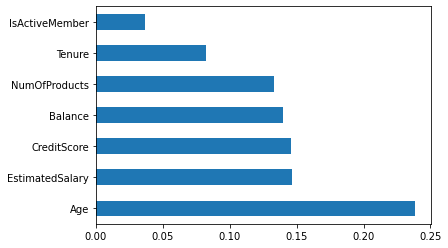

In [90]:
feat_importances.nlargest(7).plot(kind='barh') # displays top 7 features which impacts the target variable

## 10. Conclusion

To Conclude , we have achieved an accuracy of 86.25% in predicting customer churn. Now, the Bank can identify customers churn and can retain them by giving special offers or addressing their concerns.